Este experimento consiste en variar los parametros $n$ y $\alpha$ para ver cuales dan una mejor $accuracy$

In [183]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

#Cargo datos
df = pd.read_csv('../data/imdb_small.csv')

#Separo datos entrenamiento y datos prueba
text_train = df[df.type == 'train']["review"]
label_train = df[df.type == 'train']["label"]

text_test = df[df.type == 'test']["review"]
label_test = df[df.type == 'test']["label"]

#Armo modelo Bag of Words
vectorizer = CountVectorizer(max_df=0.85, min_df=0.15, max_features=5000)
vectorizer.fit(text_train)

#Transformo al modelo BoW los datos
X_train, y_train = vectorizer.transform(text_train), (label_train == 'pos').values
X_test, y_test = vectorizer.transform(text_test), (label_test == 'pos').values

In [184]:
limit = 1000
#X_train_capped = X_train[:limit]
#y_train_capped = y_train[:limit]
X_test_capped = X_test[:limit]
y_test_capped = y_test[:limit]

In [185]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [188]:
size_step = 50
size_limit = 5000

neighbor_step = 1
neighbor_limit = 100

sizeValues = [] #Tamaño de los datos de entrada
nValues = [] #Porcentaje de vecinos sobre el tamaño de entrada
accValues = [] #Accuracy

for size in range(size_step, size_limit+size_step, size_step):
    X_train_capped = X_train[:size]
    y_train_capped = y_train[:size]
    for n_percentage in range(neighbor_step, neighbor_limit+neighbor_step, neighbor_step):
        n = max(round(size*n_percentage/100), 1)
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train_capped, y_train_capped)

        y_pred_knn = knn.predict(X_test_capped)
        acc = accuracy_score(y_test_capped, y_pred_knn)
    
        sizeValues.append(size)
        nValues.append(n_percentage)
        accValues.append(acc)
        print(size, n_percentage, acc)

2500 1 0.643
2500 2 0.652
2500 3 0.639
2500 4 0.64
2500 5 0.64
2500 6 0.65
2500 7 0.644
2500 8 0.644
2500 9 0.649
2500 10 0.638
2500 11 0.639
2500 12 0.636
2500 13 0.637
2500 14 0.643
2500 15 0.636
2500 16 0.629
2500 17 0.635
2500 18 0.634
2500 19 0.643
2500 20 0.637
2500 21 0.635
2500 22 0.632
2500 23 0.645
2500 24 0.646
2500 25 0.652
2500 26 0.655
2500 27 0.653
2500 28 0.651
2500 29 0.649
2500 30 0.656
2500 31 0.638
2500 32 0.641
2500 33 0.636
2500 34 0.64
2500 35 0.647
2500 36 0.643
2500 37 0.634
2500 38 0.64
2500 39 0.63
2500 40 0.64
2500 41 0.637
2500 42 0.646
2500 43 0.657
2500 44 0.65
2500 45 0.641
2500 46 0.646
2500 47 0.648
2500 48 0.652
2500 49 0.648
2500 50 0.642
2500 51 0.637
2500 52 0.636
2500 53 0.637
2500 54 0.636
2500 55 0.646
2500 56 0.627
2500 57 0.635
2500 58 0.628
2500 59 0.624
2500 60 0.62
2500 61 0.626
2500 62 0.624
2500 63 0.614
2500 64 0.61
2500 65 0.614
2500 66 0.618
2500 67 0.619
2500 68 0.619
2500 69 0.618
2500 70 0.595
2500 71 0.585
2500 72 0.587
2500 73 0.5

KeyboardInterrupt: 

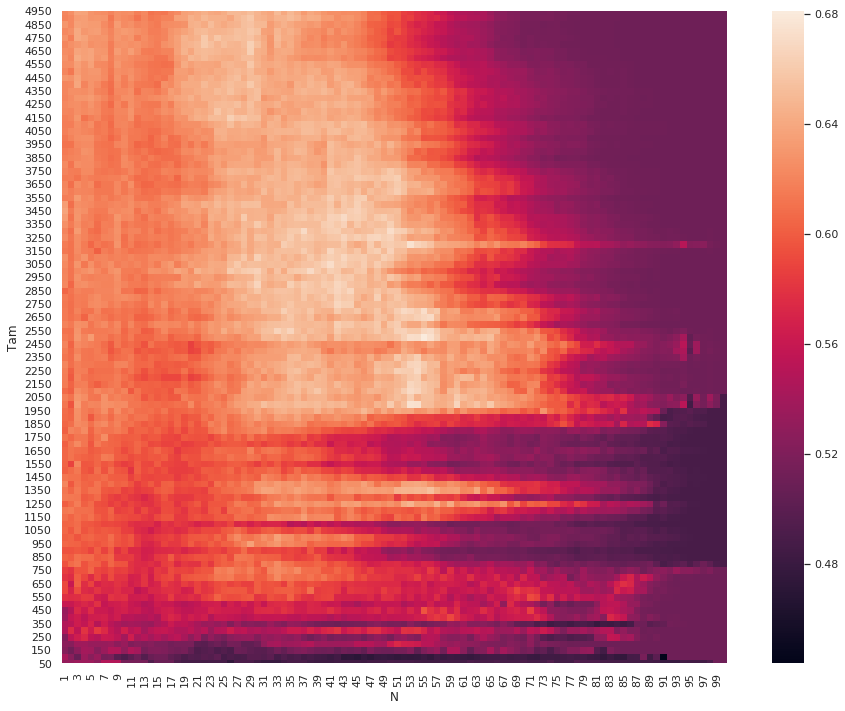

In [133]:
plt.figure(figsize=(16, 12))
dataFrame = pd.DataFrame({'Tam': sizeValues, 'N': nValues, 'Acc': accValues})
dataFrame = dataFrame.pivot('Tam', 'N', 'Acc')
sns.set(color_codes=True)
ax = sns.heatmap(dataFrame, square=True)
ax.invert_yaxis()

In [149]:
dataFrame = pd.DataFrame({'Tam': sizeValues, 'N': nValues, 'Acc': accValues})
dataFrame.to_csv('knnExperimento1')

In [147]:
n = 20
alpha = 13

X_train_dense = X_train.todense()

pca = PCA(n_components=alpha)
pca.fit(X_train_dense)
X_train_pca = pca.transform(X_train_dense)

knn_pca = KNeighborsClassifier(n_neighbors=n)
knn_pca.fit(X_train_pca, y_train_capped)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [182]:
alpha_step = 1
alpha_limit = 1000

neighbor_step = 1
neighbor_limit = 100

alphaValues = []
nValues = []
accValues = []

size = 2500
X_train_dense = X_train[:size].todense()
y_train_dense = y_train[:size]
X_test_dense = X_test_capped.todense()

for alpha in range(70, alpha_limit+alpha_step, alpha_step):
    pca = PCA(n_components=alpha)
    pca.fit(X_train_dense)
    X_train_pca = pca.transform(X_train_dense)
    X_test_pca = pca.transform(X_test_dense)
    for n_percentage in range(neighbor_step, neighbor_limit+neighbor_step, neighbor_step):

        n = max(round(size*n_percentage/100), 1)
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train_pca, y_train_dense)

        y_pred_knn_pca = knn.predict(X_test_pca)
        acc = accuracy_score(y_test_capped, y_pred_knn_pca)
    
        alphaValues.append(alpha)
        nValues.append(n_percentage)
        accValues.append(acc)
        print(alpha, n_percentage, acc)

70 1 0.631
70 2 0.641
70 3 0.637
70 4 0.64
70 5 0.635
70 6 0.639
70 7 0.635
70 8 0.642
70 9 0.648
70 10 0.638
70 11 0.649
70 12 0.646
70 13 0.651
70 14 0.656
70 15 0.644
70 16 0.643
70 17 0.64
70 18 0.641
70 19 0.637
70 20 0.644
70 21 0.634
70 22 0.637
70 23 0.637
70 24 0.638
70 25 0.644
70 26 0.654
70 27 0.649
70 28 0.636
70 29 0.644
70 30 0.638
70 31 0.636
70 32 0.631
70 33 0.625
70 34 0.634
70 35 0.649
70 36 0.637
70 37 0.632
70 38 0.628
70 39 0.63
70 40 0.628
70 41 0.617
70 42 0.635
70 43 0.634
70 44 0.639
70 45 0.619
70 46 0.622
70 47 0.617
70 48 0.617
70 49 0.615
70 50 0.63
70 51 0.614
70 52 0.611
70 53 0.605
70 54 0.615
70 55 0.602
70 56 0.607
70 57 0.607
70 58 0.606
70 59 0.601
70 60 0.605
70 61 0.608
70 62 0.607
70 63 0.595
70 64 0.599
70 65 0.598


KeyboardInterrupt: 

In [164]:
X_train_pca = pca.transform(X_train_dense)

In [166]:
X_train_pca.shape

(500, 50)

In [167]:
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train_pca, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [500, 6225]